# HD-BET tutorial
[HD-BET](https://github.com/MIC-DKFZ/HD-BET) is a UNET model that performs skullstripping of pre- and post-constrast T1, T2 and FALIR MRIs. It works on both Windows and Linux.

If you are using HD-BET, please cite HD-BET:

> Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A,
Schlemmer HP, Heiland S, Wick W, Bendszus M, Maier-Hein KH, Kickingereder P.
Automated brain extraction of multi-sequence MRI using artificial neural
networks. Hum Brain Mapp. 2019; 1–13. https://doi.org/10.1002/hbm.24750

> Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.

### Installation
Installation instructions are available at https://github.com/MIC-DKFZ/HD-BET. Most of the time you can just run `pip install hd-bet`.

### Usage
If you don't want to use mrid, HD-BET can be used from the terminal as described in https://github.com/MIC-DKFZ/HD-BET. 

mrid provides an API for HD-BET in `mrid.hd_bet` subpackage, as well as `study.skullstrip_hd_bet`, method on `mrid.Study`. Let's review the ``mrid.hd_bet`` functionality first.

#### Data
For this example we download some MRIs from https://zenodo.org/records/7213153 in DICOM format.

Colin Vanden Bulcke. (2022). Open-Access DICOM MRI session (1.0) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.7213153

In [1]:
# uncoment if running on Colab or Kaggle
# !pip install mrid
# !pip install hd-bet # for skullstripping
# !pip install SimpleITK-SimpleElastix # for registration

# note that since the download is large, this script may fail or download corrupted ZIP. 
# In this case you can try downloading it manually from your browser or use any other MRIs you have.

import os, shutil, requests
from pathlib import Path

if "BMAT_MRI_session" not in os.listdir("data"):

    # download
    if "BMAT_MRI_session.zip" not in os.listdir("data"):
        response = requests.get("https://zenodo.org/records/7213153/files/BMAT_MRI_session.zip?download=1", stream=True)
        response.raise_for_status()
        with open("data/BMAT_MRI_session.zip", 'wb') as file:
            shutil.copyfileobj(response.raw, file) # type:ignore

    # unpack
    shutil.unpack_archive("data/BMAT_MRI_session.zip", "data")

ROOT = Path("data/BMAT_MRI_session/export/home1/sdc_image_pool/images/p883/e1007")
os.listdir(ROOT)

['s16342',
 's16335',
 's16343',
 's16329',
 's16341',
 's16340',
 's16336',
 's16337',
 's16328',
 's16330']

#### Skullstripping one image

Skullstripping one image can be performed via `mrid.hd_bet.skullstrip` function.

First thing you need to know is that HD-BET expects images to be in MNI152 space. In mrid HD-BET methods have a `register_to_mni152` argument which accepts type of modality ("T1" or "T2"), this registers input scans to MNI152 brain atlas of specified modality before passing it to HD-BET, and an inverse transform is applied to the predicted brain mask. If your input scan is not in MNI152 space or if you are not sure about this, make sure to specify the `register_to_mni152` argument with type of modality of your scan.

Then skullstripping is straightforward, pass your scan to `mrid.hd_bet.skullstrip` and it returns a `sitk.Image` of the skullstripped scan. The scans you pass can be path to a .nii.gz file, DICOM directory, sitk.Image, numpy array or torch tensor.

By default HD-BET runs on GPU if it is available, it may take a few minutes on GPU. You'll need to have 4GB of VRAM. Registration to and from MNI152 will also take a few minutes. 

If you don't have a GPU, it will run on CPU which is significantly slower, in that case it is recommended to disable test-time augmentation by passsing ``disable_tta=True`` to speed it up, but it might still take an hour.


########################
If you are using hd-bet, please cite the following papers:

Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W, Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificial neural networks. arXiv preprint arXiv:1901.11341, 2019.

Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
########################

There are 1 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 1 cases that I would like to predict

Predicting output_bet.nii.gz:
perform_everything_on_device: True


100%|██████████| 6/6 [03:08<00:00, 31.43s/it]


sending off prediction to background worker for resampling and export
done with output_bet.nii.gz


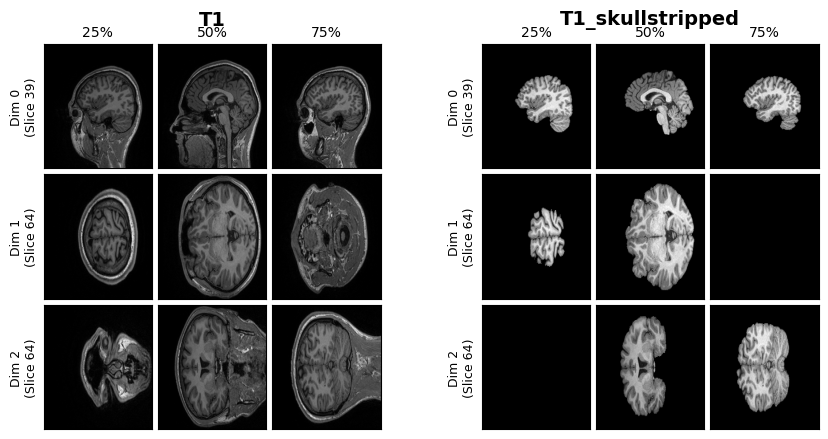

In [2]:
import mrid
T1 = ROOT / "s16329"
T1_skullstripped = mrid.hd_bet.skullstrip(T1, register_to_mni152="T1") # sitk.Image

mrid.utils.plot_study({"T1": T1, "T1_skullstripped": T1_skullstripped})

#### Getting the brain mask
If you just need the brain mask, use `mrid.hd_bet.predict_brain_mask`.


########################
If you are using hd-bet, please cite the following papers:

Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W, Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificial neural networks. arXiv preprint arXiv:1901.11341, 2019.

Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
########################

There are 1 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 1 cases that I would like to predict

Predicting output_bet.nii.gz:
perform_everything_on_device: True


100%|██████████| 6/6 [03:08<00:00, 31.37s/it]


sending off prediction to background worker for resampling and export
done with output_bet.nii.gz


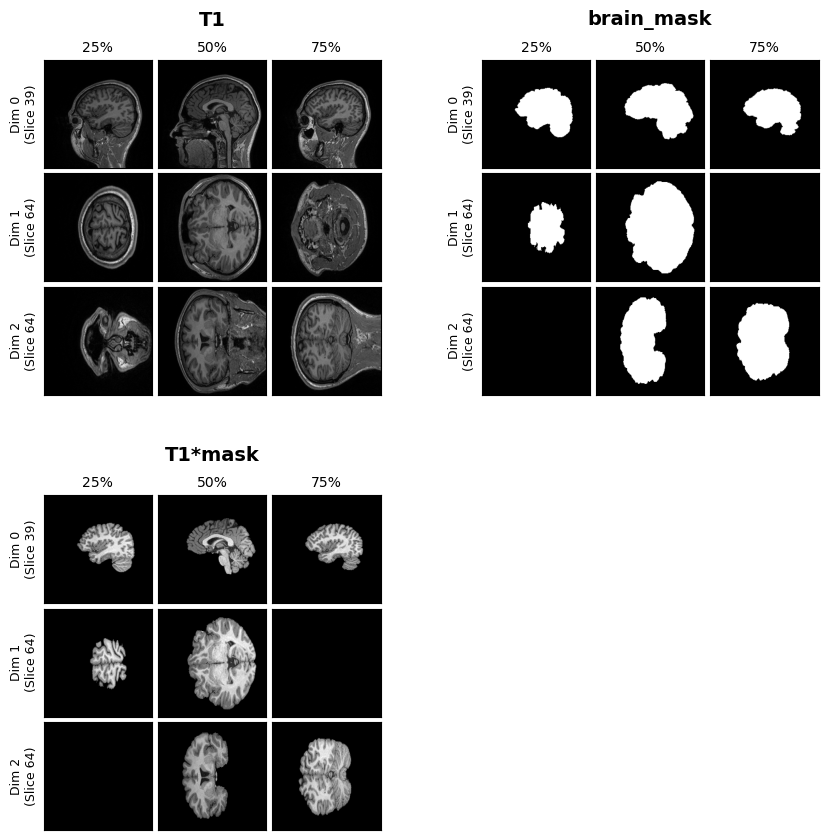

In [3]:
brain_mask = mrid.hd_bet.predict_brain_mask(T1, register_to_mni152="T1") # sitk.Image

mrid.utils.plot_study({"T1": T1, "brain_mask": brain_mask, "T1*mask": mrid.mask.apply_mask(T1, brain_mask)})

#### Skullstripping multiple modalities
If you have multiple aligned modalities, you can predict brain mask on the most high-resolution one and apply it to all modalities. In this case all modalities must be aligned. Since in the sample dataset modalities are not aligned, we will first align them using SimpleElastix. Then we can use `mrid.hd_bet.skullstrip_D` function to predict brain mask on one modality and apply it to all modalities.

`mrid.hd_bet.skullstrip_D` returns a new dictionary with the same keys as input dictionary, but all values are skull-stripped `sitk.Image`. 

if you pass `keep_original=True`, it keeps original images before skull-stripping, and add skull-stripped scans with `_hd_bet` postfix. 

You can also pass `include_mask` to add a `seg_hd_bet` key with the predicted brain mask.


########################
If you are using hd-bet, please cite the following papers:

Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W, Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificial neural networks. arXiv preprint arXiv:1901.11341, 2019.

Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
########################

There are 1 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 1 cases that I would like to predict

Predicting output_bet.nii.gz:
perform_everything_on_device: True


100%|██████████| 6/6 [03:08<00:00, 31.37s/it]


sending off prediction to background worker for resampling and export
done with output_bet.nii.gz
data_skullstripped = {'T1': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x7fbf80414f60> >, 'FLAIR': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x7fbf8061dce0> >}


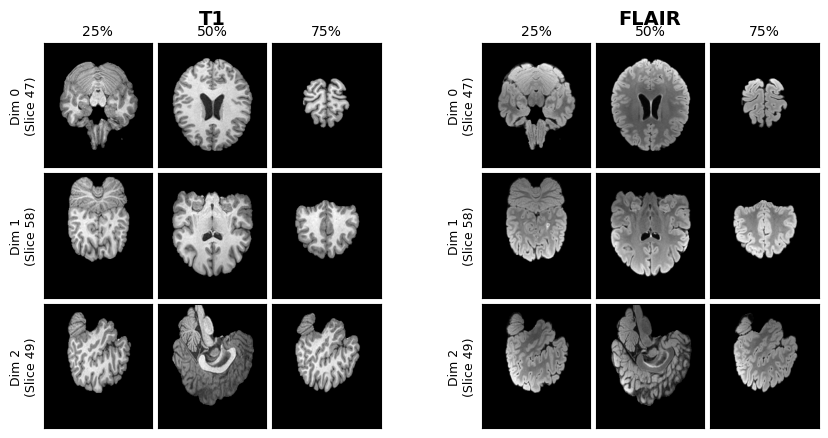

In [4]:
data = {
    "T1": ROOT / "s16329",
    "FLAIR": ROOT/"s16340",
}

# T1 and FLAIR scans are not aligned (they have different sizes).
# We have to first align them to some common space. 
# Since HD-BET expects MNI152, we can align to MNI152 using `mrid.simple_elastix.register_each`
# this function registers T1 to MNI152 atlas, and then registers all other modalities to T1.
template = mrid.get_mni152("2009a T1w asymmetric")
data_mni152 = mrid.simple_elastix.register_each(data, key="T1", to=template)

# pass data["T1"] to HD-BET
data_skullstripped = mrid.hd_bet.skullstrip_D(data_mni152, key="T1")

print(f"{data_skullstripped = }")
mrid.utils.plot_study(data_skullstripped)

### Study interace

`study.skullstrip_hd_bet` is essentially the same as `mrid.hd_bet.skullstrip_D`. 

It does not affect segmentations (keys starting with `"seg"`). 


########################
If you are using hd-bet, please cite the following papers:

Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W, Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificial neural networks. arXiv preprint arXiv:1901.11341, 2019.

Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
########################

There are 1 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 1 cases that I would like to predict

Predicting output_bet.nii.gz:
perform_everything_on_device: True


100%|██████████| 6/6 [03:08<00:00, 31.37s/it]


sending off prediction to background worker for resampling and export
done with output_bet.nii.gz
study_skullstripped = {'seg_hd_bet': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x7fbf80583120> >, 'T1': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x7fbf806ceca0> >, 'FLAIR': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x7fbf805a9170> >}


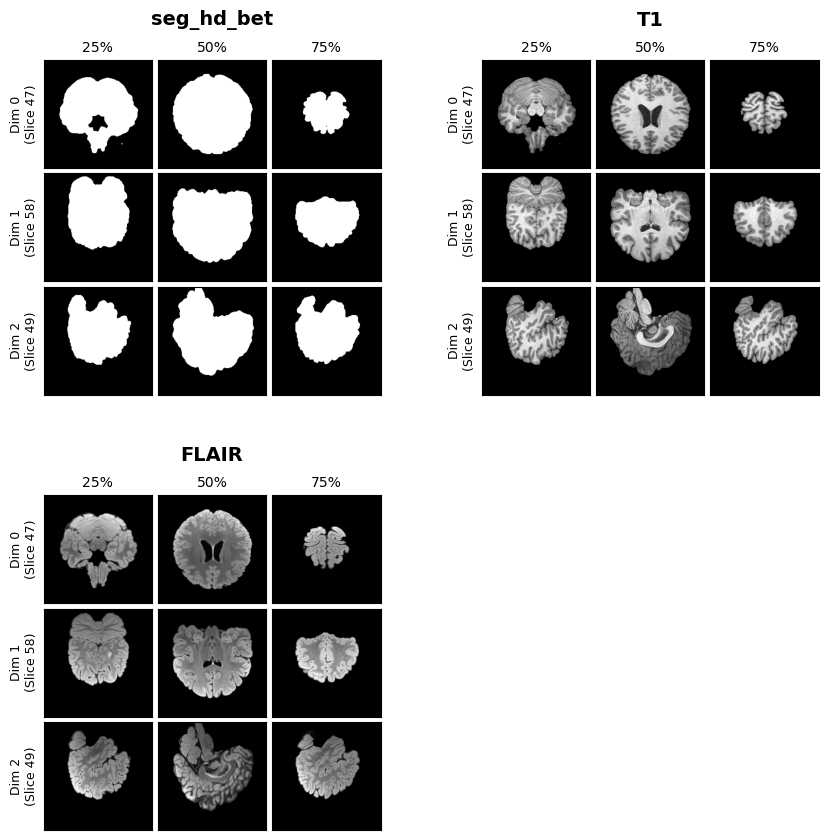

In [5]:
study = mrid.Study(T1 = ROOT / "s16329", FLAIR = ROOT/"s16340")

# align to MNI152
study_mni152 = study.register_each_SE(key="T1", to=mrid.get_mni152("2009a T1w asymmetric"))

# pass study["T1"] to HD-BET
study_skullstripped = study_mni152.skullstrip_hd_bet(key="T1", include_mask=True)

print(f"{study_skullstripped = }")
study_skullstripped.plot()